# GROUPE 10 inf3236
. TCHOUPE KENGNE DEKEL JUNIOR 19M2394 \
. NKOUNGHAWE TOMEYUM ROSALIE CORINE 19M2333 \
. BAPOLA AMASSA RICHIL PERRIN 19M2661 \
. OBAMA MEVOUNGOU DRYSTAN GODGIFT 19M2132 \


### TP1: implémentation de la première partie du tuto 

# **Préparation des données pour la construction d'un modèle**

### Chargement du data set d'iris

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

iris.target 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### On observe bien que les classes sont clairement en ordre de telle sorte que si on fait une division sans utiliser le random on risque d'avoir un modèle qui ne maitrise que deux classes

### Divisons le data set avec la fonction "permutation" de la fonction "random" sur la taille de ce dernier afin d'avoir une suite d'indices aléatoirement entre 0-149. Ces indices vont nous aider dans la division du jeu de données

In [ ]:
indices = np.random.permutation(len(iris.data))
indices 

array([136,  28,  35, 115,  36,  42,  78, 121,  18, 100, 125, 132,  77,
       114, 126,  69, 124, 117,  50, 111,  88,  25,  58,  82,   1, 109,
        27, 112,  14, 101, 104, 135,  93,  13,   4,  23,   8,  33,  60,
        37,  87,  94, 123,  66,  29,  80,   6,  68,  89,  99,  16,  49,
        72, 134,  45,  75,  52,  10, 138,  11,  90, 147,  95, 133,  39,
        67,  73,  64,  30,  91,  61, 119, 145,  43, 127,  15,  79,  20,
         9,  46,  12,  26,  47,  38, 130,  21,  48,  57,  59, 106, 143,
        62,  34, 102,  22,  92,   3,  70, 129,  17,  41, 118,  65,  76,
       141,  44, 142, 146, 120,   5,  84,  83,  97, 116,  40,  98, 108,
        31,  19,   0, 103,  86, 144,  51, 148, 128,  81, 137,  96,  71,
       105, 122,  32,  55,   7, 110, 139,   2,  54,  53,  56, 131, 107,
       140,  85, 149,  24,  74, 113,  63])

### On effectue la division proprement dite,
### On se fixe 12 comme taille pour les données de test,
### On reste avec 138 pour l'apprentissage

In [ ]:
n_test_samples = 12
learnset_data = iris.data[indices[:-n_test_samples]]
learnset_labels = iris.target[indices[:-n_test_samples]]
testset_data = iris.data[indices[-n_test_samples:]]
testset_labels = iris.target[indices[-n_test_samples:]]


[[6.3 3.4 5.6 2.4]
 [5.2 3.4 1.4 0.2]
 [5.  3.2 1.2 0.2]
 [6.4 3.2 5.3 2.3]] [2 0 0 2]
[[6.5 2.8 4.6 1.5]
 [5.5 2.3 4.  1.3]
 [6.3 3.3 4.7 1.6]
 [7.9 3.8 6.4 2. ]] [1 1 1 2]



# Affichage de 4 échantillons pour chacun des ensembles ainsi que les labels



In [ ]:
print(learnset_data[:4], learnset_labels[:4])
print(testset_data[:4], testset_labels[:4])

### La division du data set avec sklearn en utilisant "train_test_split" qui émane de "model_selection"

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
data, labels = iris.data, iris.target
res = train_test_split(data, labels,
train_size=0.8,
test_size=0.2,
random_state=42)
train_data, test_data, train_labels, test_labels = res
n = 7
print(f"Les {n} premières données:")
print(test_data[:7])
print(f"Les  {n} caractéristiques correspondantes:")
print(test_labels[:7])

Les 7 premières données:
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]
 [5.4 3.4 1.5 0.4]
 [5.6 2.9 3.6 1.3]]
Les  7 caractéristiques correspondantes:
[1 0 2 1 1 0 1]


### **Division du data set avec la méthode de "stratification", Ici nous aurons une moyenne des étiquettes des observations qui sera sensiblement pareille dans chacun des deux ensembles. Pour celà, nous utilisons "bincount"**

In [ ]:
import numpy as np
print('All:', np.bincount(labels) / float(len(labels)) * 100.0)
print('Training:', np.bincount(train_labels) / float(len(train_labels)) * 100.0)
print('Test:', np.bincount(test_labels) / float(len(test_labels))
* 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 34.16666667 32.5       ]
Test: [33.33333333 30.         36.66666667]


# **En faisant une combinaison de la fontion "train_test_split" et la "stratification", nous avons le bout de code suivant**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
data, labels = iris.data, iris.target
res = train_test_split(data, labels,
train_size=0.8,
test_size=0.2,
random_state=42,
stratify=labels)
train_data, test_data, train_labels, test_labels = res
print('All:', np.bincount(labels) / float(len(labels)) * 100.0)
print('Training:', np.bincount(train_labels) / float(len(train_labels)) * 100.0)
print('Test:', np.bincount(test_labels) / float(len(test_labels))
* 100.0)


All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]


### On constate que la moyenne des étiquettes est pareille dans les deux ensembles (Training et Test) ce qui se retrouve encore dans le data set tout entier. Ceci se produit à cause du fait que les 3 étiquettes sont en nombre égal chacune et ne sont pas mélangés. 

## Cette méthode de division n'est donc pas adaptée pour ce type de data set

## Création d'un data set et affichage de ce dernier

In [ ]:
import numpy as np
import pandas as pd
cities = ['Berlin', 'Frankfurt', 'Hamburg',
'Nuremberg', 'Munich', 'Stuttgart',
'Hanover', 'Saarbruecken', 'Cologne',
'Constance', 'Freiburg', 'Karlsruhe']

n= len(cities)
data = {'Temperature': np.random.normal(24, 3, n),
'Humidity': np.random.normal(78, 2.5, n),
'Wind': np.random.normal(15, 4, n)
}
df = pd.DataFrame(data=data, index=cities)
df

,Temperature,Humidity,Wind
Berlin,21.873098,75.906804,17.427153
Frankfurt,23.670622,73.064258,8.979454
Hamburg,24.839731,79.813067,13.622589
Nuremberg,23.517451,80.551500,21.561739
Munich,27.321995,81.813123,15.608942
Stuttgart,25.227419,78.572844,15.524331
Hanover,21.029817,78.423924,18.371304
Saarbruecken,30.011388,76.998002,14.834280
Cologne,21.312589,76.539787,19.865266
Constance,28.652259,84.293047,8.192071


## Crétation d'un autre data set et stockage de ce dernier dans un fichier  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10, type=int):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
def truncated_normal_floats(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num)
def truncated_normal_ints(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num).astype(np.uint8)
# number of items for each flower class:
number_of_items_per_class = [190, 205, 230, 170]
flowers = {}
# flos Pythonem:
number_of_items = number_of_items_per_class[0]
reds = truncated_normal_ints(mean=254, sd=18, low=235, upp=256,
num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=15, low=0, upp=20,
num=number_of_items)
calyx_dia = truncated_normal_floats(3.8, 0.3, 3.4, 4.2,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_pythonem"] = data
# flos Java:
number_of_items = number_of_items_per_class[1]
reds = truncated_normal_ints(mean=245, sd=17, low=226, upp=256,
num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=10, low=0, upp=20,
num=number_of_items)
calyx_dia = truncated_normal_floats(3.3, 0.3, 3.0, 3.5,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_java"] = data
# flos Java:
number_of_items = number_of_items_per_class[2]
reds = truncated_normal_ints(mean=206, sd=17, low=175, upp=238,
num=number_of_items)
greens = truncated_normal_ints(mean=99, sd=14, low=80, upp=120,
num=number_of_items)
blues = truncated_normal_ints(mean=1, sd=5, low=0, upp=12,
num=number_of_items)
calyx_dia = truncated_normal_floats(4.1, 0.3, 3.8, 4.4,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_margarita"] = data
# flos artificialis:
number_of_items = number_of_items_per_class[3]
reds = truncated_normal_ints(mean=255, sd=8, low=2245, upp=2255,
num=number_of_items)
greens = truncated_normal_ints(mean=254, sd=10, low=240, upp=255,
num=number_of_items)
blues = truncated_normal_ints(mean=101, sd=5, low=90, upp=112,
num=number_of_items)
calyx_dia = truncated_normal_floats(2.9, 0.4, 2.4, 3.5,
num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_artificialis"] = data
data = np.concatenate((flowers["flos_pythonem"],
flowers["flos_java"],
flowers["flos_margarita"],
flowers["flos_artificialis"]
), axis=0)
# assigning the labels
target = np.zeros(sum(number_of_items_per_class)) # 4 flowers
previous_end = 0
for i in range(1, 5):
    num = number_of_items_per_class[i-1]
    beg = previous_end
    target[beg: beg + num] += i
    previous_end = beg + num
conc_data = np.concatenate((data, target.reshape(target.shape[0],1)),axis=1)
np.savetxt("strange_flowers.txt", conc_data, fmt="%2.2f",) 

## On sauvegarde le data set dans le fichier nommé "strange_flowers.txt et on le stoke dans le repertoire courant"

## **Affichage du data set crée et recherche d'un meilleure moyen de  séparation entre les caractérisques**

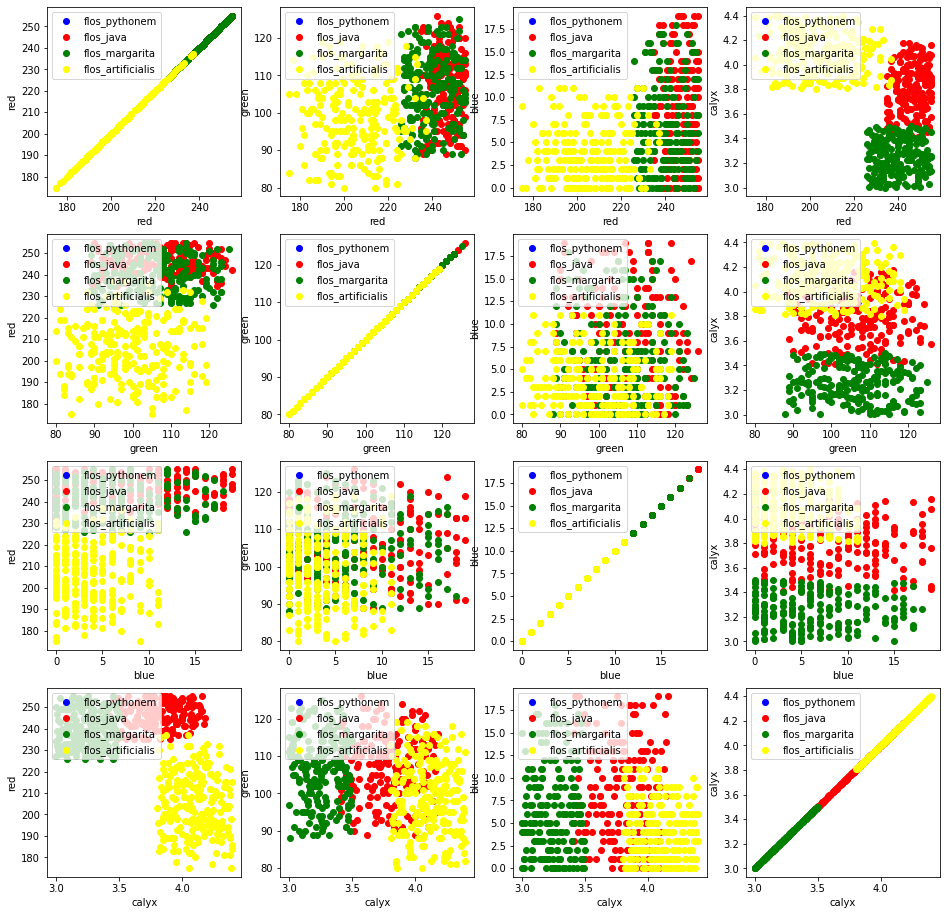

In [ ]:
import matplotlib.pyplot as plt
target_names = list(flowers.keys())
feature_names = ['red', 'green', 'blue', 'calyx']
n = 4
fig, ax = plt.subplots(n, n, figsize=(16, 16))
colors = ['blue', 'red', 'green', 'yellow']
for x in range(n):
    for y in range(n):
        xname = feature_names[x]
        yname = feature_names[y]
        for color_ind in range(len(target_names)):
            ax[x, y].scatter(data[target==color_ind, x],
            data[target==color_ind, y],
            label=target_names[color_ind],
            c=colors[color_ind])
        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        ax[x, y].legend(loc='upper left')

## **Création d'un data set plus facilement avec sklearn en utilisant la fonction "make_blobs"** 

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
data, labels = make_blobs(n_samples=1000,
#centers=n_classes,
centers=np.array([[2, 3], [4, 5], [7,
9]]),
random_state=1)
labels = labels.reshape((labels.shape[0],1))
all_data = np.concatenate((data, labels), axis=1)
all_data[:10]
np.savetxt("squirrels.txt", all_data)
all_data[:10]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])

## **comprendre la combinaison de remodelage et de concaténation**

In [ ]:
import numpy as np
a = np.array( [[1, 2], [3, 4]])
b = np.array( [5, 6])
# remodelage
b = b.reshape((b.shape[0], 1))
print(b)
# concatenation
x = np.concatenate( (a, b), axis=1)
x


[[5]
 [6]]


array([[1, 2, 5],
       [3, 4, 6]])

## **LECTURE DES DONNEES ETRECONVERSION EN 'DONNÉES'ET 'ÉTIQUETTES'**

In [ ]:
file_data = np.loadtxt("squirrels.txt")
data = file_data[:,:-1]
labels = file_data[:,2:]
labels = labels.reshape((labels.shape[0]))


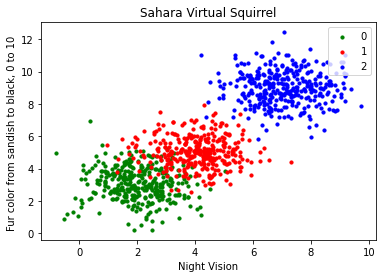

In [ ]:
import matplotlib.pyplot as plt
colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
n_classes = 3
fig, ax = plt.subplots()
for n_class in range(0, n_classes):
  ax.scatter(data[labels==n_class, 0], data[labels==n_class,1],
  c=colours[n_class], s=10, label=str(n_class))
ax.set(xlabel='Night Vision',
ylabel='Fur color from sandish to black, 0 to 10 ',
title='Sahara Virtual Squirrel')
ax.legend(loc='upper right')

### Nous entrainerons nos données artificielles créees avec le bout de code suivant

In [ ]:
from sklearn.model_selection import train_test_split
data_sets = train_test_split(data,
labels,
train_size=0.8,
test_size=0.2,
random_state=42 # garantees same output fr every run
)
train_data, test_data, train_labels, test_labels = data_sets


#**Implémentation des KNN, prédiction avec le model importé de sklearn**

In [ ]:
# import model
from sklearn.neighbors import KNeighborsClassifier
# create classifier
knn = KNeighborsClassifier(n_neighbors=8)
# train
knn.fit(train_data, train_labels)
# test on test data:
calculated_labels = knn.predict(test_data)
calculated_labels

array([2., 0., 1., 1., 0., 1., 2., 2., 2., 2., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 0., 1., 2., 1., 2., 2., 1., 2., 0., 0., 2., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 1., 0., 1., 1., 2., 0., 2., 1., 2., 1., 0., 2.,
       1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 2., 1., 2., 0., 2., 1.,
       1., 0., 2., 2., 2., 0., 1., 1., 1., 2., 2., 0., 2., 2., 2., 2., 0.,
       0., 1., 1., 1., 2., 1., 1., 1., 0., 2., 1., 2., 0., 0., 1., 0., 1.,
       0., 2., 2., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 0., 2., 0.,
       0., 1., 0., 2., 2., 0., 0., 1., 2., 1., 2., 0., 0., 2., 2., 0., 0.,
       1., 2., 1., 2., 0., 0., 1., 2., 1., 0., 2., 2., 0., 2., 0., 0., 2.,
       1., 0., 0., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 2., 0., 2., 2., 1., 1., 1., 2.])

## Evaluation du modèle avec l'accuracy, qui est une métrique de sklearn

In [ ]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(test_labels, calculated_labels))


Accuracy: 0.97


## On voit que le modèle fait de bonne prédictions à 97% sur nos données de tests artificielles que nous avons crée

## **AUTRE DISTRIBUTIONS INTERESSANTES**

In [ ]:

import numpy as np
import sklearn.datasets as ds
data, labels = ds.make_moons(n_samples=150,
shuffle=True,
noise=0.19,
random_state=None)
data += np.array(-np.ndarray.min(data[:,0]),
-np.ndarray.min(data[:,1]))
np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])


(0.0, 0.32765714524401934)

## Affichage graphique

[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'Moons')]

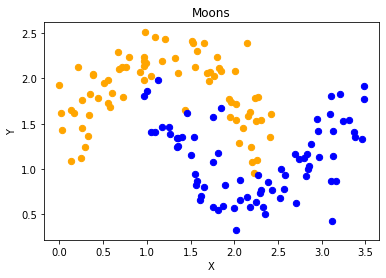

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data[labels==0, 0], data[labels==0, 1],
c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],
c='blue', s=40, label='blues')
ax.set(xlabel='X',
ylabel='Y',
title='Moons')

## La mise à l'échelle des valeurs dans une plage de [a,b] dans le but de transformer les coordonnées X et Y des données en d'autres plages

In [ ]:
min_x_new, max_x_new = 33, 88
min_y_new, max_y_new = 12, 20
data, labels = ds.make_moons(n_samples=100,
shuffle=True,
noise=0.05,
random_state=None)
min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])
data -= np.array([min_x, min_y])
data *= np.array([(max_x_new - min_x_new) / (max_x - min_x), (max_y_new - min_y_new) / (max_y - min_y)])
data += np.array([min_x_new, min_y_new])

## Affichage des 6 premières nouvelles données obtenues après la mise à l'échelle
data[:6]



array([[74.06433759, 12.37004288],
       [68.39690019, 15.29592763],
       [52.07971108, 15.29475478],
       [79.63248339, 13.01276108],
       [33.        , 15.99863921],
       [61.52897624, 18.85921474]])

## Usage d'une fonction pour la mise à l'échelle, elle prend en paramètre les données, les nouvelles limites et précise si les données doivent etre copiées temporairement à cause du volume du data set par exemple puis elle retourne le nouveau data set

In [ ]:
def scale_data(data, new_limits, inplace=False ):
  if not inplace:
    data = data.copy()
    min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
    max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])
    min_x_new, max_x_new = new_limits[0]
    min_y_new, max_y_new = new_limits[1]
    data -= np.array([min_x, min_y])
    data *= np.array([(max_x_new - min_x_new) / (max_x - min_x),
    (max_y_new - min_y_new) / (max_y - min_y)])
    data += np.array([min_x_new, min_y_new])
  if inplace:
    return None
  else:
    return data

## Les nouvelles données

In [ ]:
data, labels = ds.make_moons(n_samples=100,
shuffle=True,
noise=0.05,
random_state=None)
scale_data(data, [(1, 4), (3, 8)], inplace=True)
# Affichage des 10 premières nouvelles données
data[:10]

array([[ 0.0378474 ,  1.00150326],
       [-0.89226111,  0.34892493],
       [-0.33216843,  0.8798358 ],
       [-0.22858092,  0.92701316],
       [ 0.62660778,  0.80600098],
       [-0.40764539,  0.90884973],
       [ 0.89082747,  0.55694998],
       [-0.66572744,  0.84505751],
       [-0.27020058,  0.96018081],
       [-1.0476241 ,  0.02563851]])

## Affichage graphique 

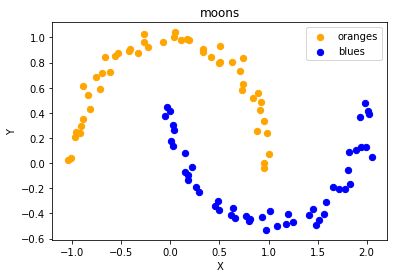

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data[labels==0, 0], data[labels==0, 1],
c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],
c='blue', s=40, label='blues')
ax.set(xlabel='X',
ylabel='Y',
title='moons')
ax.legend(loc='upper right');

## On constaque un changement sur la distribution des données ceci peut se voir meme graphiquement, ceci grace à la fonction make_moons

## Autre mise à l'échelle toujours avec les memes données

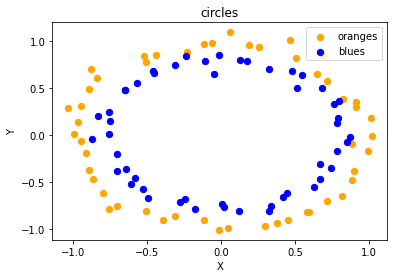

In [ ]:
import sklearn.datasets as ds
data, labels = ds.make_circles(n_samples=100,
shuffle=True,
noise=0.05,
random_state=None)

fig, ax = plt.subplots()
ax.scatter(data[labels==0, 0], data[labels==0, 1],
c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],
c='blue', s=40, label='blues')
ax.set(xlabel='X',
ylabel='Y',
title='circles')
ax.legend(loc='upper right')

## Ici on constaque que l'espace d'hypothèses a également bien changé, ceci grace à la fonction make_circles

## Automatically created module for IPython interactive environment

Automatically created module for IPython interactive environment


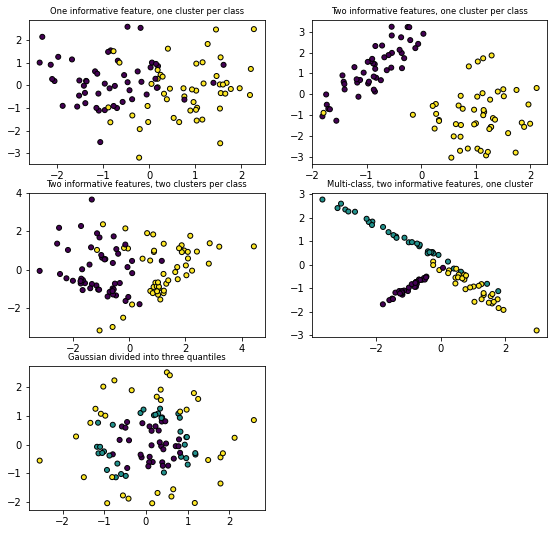

In [ ]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
plt.subplot(323)
plt.title("Two informative features, two clusters per class",
fontsize='small')
X2, Y2 = make_classification(n_features=2,
n_redundant=0,
n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,s=25, edgecolor='k')
plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster",
fontsize='small')
X1, Y1 = make_classification(n_features=2,
n_redundant=0,
n_informative=2,
n_clusters_per_class=1,
n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
s=25, edgecolor='k')
plt.subplot(325)
plt.title("Gaussian divided into three quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
s=25, edgecolor='k')
plt.show()

## **Exercices** 

### Créez deux ensembles de tests séparables avec un perceptron sans nœud de biais en d'autre termes la séparation peut se faire avec une ligne qui passe par l'origine


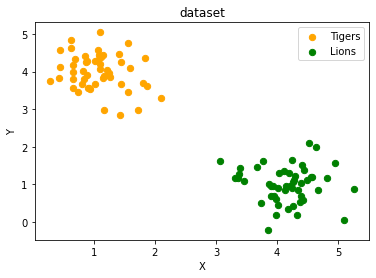

In [ ]:
data, labels = make_blobs(n_samples=100,
cluster_std = 0.5,
centers=[[1, 4] ,[4, 1]],
random_state=1)
fig, ax = plt.subplots()
colours = ["orange", "green"]
label_name = ["Tigers", "Lions"]
for label in range(0, 2):
  ax.scatter(data[labels==label, 0], data[labels==label, 1],
  c=colours[label], s=40, label=label_name[label])
ax.set(xlabel='X',
ylabel='Y',
title='dataset')
ax.legend(loc='upper right')


### Créez deux jeux de tests qui ne sont pas séparables avec une ligne de séparation passant par l'origine

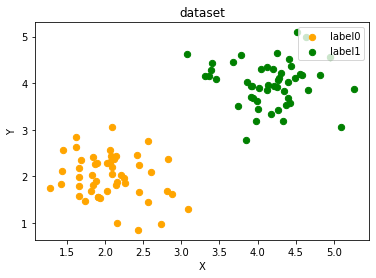

In [ ]:
data, labels = make_blobs(n_samples=100,
cluster_std = 0.5,
centers=[[2, 2] ,[4, 4]],
random_state=1)
fig, ax = plt.subplots()
colours = ["orange", "green"]
label_name = ["label0", "label1"]
for label in range(0, 2):
  ax.scatter(data[labels==label, 0], data[labels==label, 1],
  c=colours[label], s=40, label=label_name[label])
ax.set(xlabel='X',ylabel='Y',title='dataset')
ax.legend(loc='upper right')

### On constate bien qu'une ligne passant par l'origine ne peut pas faire une bonne séparation

### Créez un ensemble de données avec cinq classes "Tiger", "Lion", "Penguin", "Dolphin" et "Python". Les ensembles doivent ressembler
similaire au schéma donné dans le tutoriel

In [ ]:
import sklearn.datasets as ds
data, labels = ds.make_circles(n_samples=100,
shuffle=True,
noise=0.05,
random_state=42)
centers = [[3, 4], [5, 3], [4.5, 6]]
data2, labels2 = make_blobs(n_samples=100,
cluster_std = 0.5,
centers=centers,
random_state=1)
for i in range(len(centers)-1, -1, -1):
  labels2[labels2==0+i] = i+2
print(labels2)
labels = np.concatenate([labels, labels2])
data = data * [1.2, 1.8] + [3, 4]
data = np.concatenate([data, data2], axis=0)
## On a fait une concatenation de deux data set

[2 4 4 3 4 4 3 3 2 4 4 2 4 4 3 4 2 4 4 4 4 2 2 4 4 3 2 2 3 2 2 3 2 3 3 3 3
 3 4 3 3 2 3 3 3 2 2 2 2 3 4 4 4 2 4 3 3 2 2 3 4 4 3 3 4 2 4 2 4 3 3 4 2 2
 3 4 4 2 3 2 3 3 4 2 2 2 2 3 2 4 2 2 3 3 4 4 2 2 4 3]


### Affichage graphique de la distribution

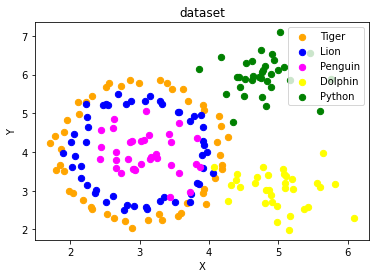

In [ ]:
fig, ax = plt.subplots()
colours = ["orange", "blue", "magenta", "yellow", "green"]
label_name = ["Tiger", "Lion", "Penguin", "Dolphin", "Python"]
for label in range(0, len(centers)+2):
  ax.scatter(data[labels==label, 0], data[labels==label, 1],
  c=colours[label], s=40, label=label_name[label])
ax.set(xlabel='X',
ylabel='Y',
title='dataset')
ax.legend(loc='upper right')

### Les 5 classes peuvent se repérer rapidement sur le graphique